In [2]:
import pandas as pd
import datetime
import numpy as np

import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.express as px
import jupyter_dash
from dash.dependencies import Input, Output
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from IPython.display import display

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

In [3]:
# pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg' #or 'retina'. Makes the images more clear

In [5]:
#experiment2 = pd.read_csv('data/experiment2.csv', encoding='utf-8')
#experiment2['Date'] = pd.to_datetime(experiment2['Date'])
#experiment2 = experiment2.set_index('Date')
#experiment2

In [6]:
df = pd.read_csv('data/df2_shifted.csv', encoding='utf-8')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df

Step Count  Resting Heart Rate  Number of Floors  \
Date                                                           
2020-01-01        1041                56.0                 0   
2020-01-02         321                58.0                 0   
2020-01-03        1659                57.0                 1   
2020-01-04        8407                58.0                 8   
2020-01-05        4520                57.0                 2   
...                ...                 ...               ...   
2023-03-06        5008                54.0                 3   
2023-03-07        4960                55.0                 8   
2023-03-08         358                53.0                 0   
2023-03-09         749                54.0                 0   
2023-03-10        3203                53.0                 1   

            Heart Rate Count  Heart Rate Mean  Heart Rate STD  \
Date                                                            
2020-01-01            1349.0        61.689400        7.496629   
2020-01-02            1421.0        61.500352        7.566385   
2020-01-03            1298.0        63.006934       10.599273   
2020-01-04            1390.0        66.987050       10.906427   
2020-01-05            1407.0        64.260128        9.231062   
...                      ...              ...             ...   
2023-03-06            1414.0        62.904526       13.044269   
2023-03-07            1419.0        71.594785        9.812272   
2023-03-08            1407.0        57.001421       10.917119   
2023-03-09            1440.0        62.082639        8.746971   
2023-03-10            1390.0        60.641727       17.659804   

            Heart Rate Minimum  Heart Rate 25%  Heart Rate Median  \
Date                                                                
2020-01-01                46.0            57.0               60.0   
2020-01-02                39.0            56.0               61.0   
2020-01-03                48.0            54.0               62.0   
2020-01-04                53.0            60.0               64.0   
2020-01-05                51.0            58.0               62.0   
...                        ...             ...                ...   
2023-03-06                45.0            52.0               58.0   
2023-03-07                50.0            66.0               70.0   
2023-03-08                43.0            49.0               52.0   
2023-03-09                48.0            56.0               60.0   
2023-03-10                44.0            48.0               52.0   

            Heart Rate 75%  Heart Rate Maximum  Mood  Pain  Tired  Sick  \
Date                                                                      
2020-01-01            65.0                98.0   1.0   0.0    0.0   0.0   
2020-01-02            66.0               102.0   1.0   0.0    0.0   0.0   
2020-01-03            70.0               135.0   2.0   0.0    0.0   0.0   
2020-01-04            71.0               126.0   1.0   2.0    1.0   0.0   
2020-01-05            68.0               118.0   2.0   2.0    0.0   0.0   
...                    ...                 ...   ...   ...    ...   ...   
2023-03-06            74.0               115.0   2.0   0.0    0.0   0.0   
2023-03-07            75.0               125.0   2.0   0.0    0.0   0.0   
2023-03-08            63.0               103.0   2.0   0.0    0.0   0.0   
2023-03-09            67.0               104.0   2.0   0.0    1.0   0.0   
2023-03-10            68.0               120.0   2.0   0.0    0.0   0.0   

            Anxiousness  Depressed  Suicidal  Self-Harm  Thoughts of Death  \
Date                                                                         
2020-01-01          0.0        0.0       0.0        0.0                0.0   
2020-01-02          0.0        0.0       0.0        0.0                0.0   
2020-01-03          0.0        0.0       0.0        0.0                0.0   
2020-01-04          0.0        0.0       0.0        1.0              

In [7]:
from pycaret.regression import *
metric = "mape"
exclude = [
           # "naive", 
           # "snaive", 
           "tr"
          ]
fig_kwargs={'renderer':'browser', 
            # "height":500, 
            # "width":1000
           }

In [155]:
#s = setup(df, target='Tired', fold=10, session_id=123, train_size=.8,
#        ignore_features = ['Tired_shifted', 'Mood_shifted'],
#         # normalize = True,
#          # normalize_method = 'minmax'
#          # transformation = True, 
#          # transform_target = True, 
#          # remove_multicollinearity = True, 
#          # multicollinearity_threshold = 0.95
#         )

In [16]:
s = setup(df, target='Mood', fold=10, session_id=123, train_size=.8,
          ignore_features = ['Mood_shifted'],
          # normalize = True,
          # normalize_method = 'maxabs'
          # pca=True,
          # transformation = True, 
          # transform_target = True, 
          # remove_multicollinearity = True, 
          # multicollinearity_threshold = 0.95
         )

In [8]:
best = compare_models(sort=metric, 
                      turbo=False, 
                      exclude=exclude)

In [9]:
tune_model(best)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


HuberRegressor(alpha=0.9, epsilon=1.9)

In [10]:
## evaluate trained model
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [11]:
## predict on hold-out/test set
predict_model(best)

pca0      pca1      pca2      pca3      pca4      pca5      pca6  \
932   4.912685 -2.860135  1.187618  1.397273 -0.589444  0.122874  0.299212   
933  -2.757749 -1.341879 -1.947215  0.799493 -3.326213  0.601547 -0.332684   
934  -4.714241 -1.842861  0.956135 -0.071311 -2.552942 -0.752592  2.268855   
935   5.377149  4.577208  1.647005  0.425356 -3.453054  1.233508  0.512317   
936   4.105765  1.594350  1.392264 -0.269911 -0.430274 -0.006103  0.296822   
...        ...       ...       ...       ...       ...       ...       ...   
1160  3.963823 -4.393682 -3.055045 -0.120582 -0.483994  1.576281  2.034549   
1161  6.228717 -3.904660 -0.803732  0.182333 -0.301909 -0.478298 -2.152963   
1162  2.933524 -4.167515 -3.111521 -2.406304  1.244208  2.963440  0.499206   
1163  6.734917 -0.619063 -2.344331 -4.844808  5.103551  2.766875 -0.085626   
1164 -4.499896  3.650836  0.162746  1.458168 -1.322932 -0.971058  0.024744   

          pca7      pca8      pca9  ...    pca232    pca233    pca234  \
932   0.210877 -2.878761 -1.710451  ...  0.167951  0.053324 -0.211871   
933  -0.245391  2.337114  2.220886  ...  0.027489  0.259989  0.180764   
934  -2.527560  1.064088 -0.948674  ... -0.140598 -0.021116 -0.087817   
935  -2.939189 -0.606487 -3.340439  ...  0.057595  0.208087 -0.196025   
936  -1.333738  0.937817 -0.137418  ... -0.354320 -0.042451  0.132839   
...        ...       ...       ...  ...       ...       ...       ...   
1160 -0.529129  0.665668  2.287720  ...  0.308541  0.144851 -0.069472   
1161  0.158933  0.751856  1.013483  ...  0.338078  1.606371  0.997143   
1162 -1.873466 -2.722916  1.767971  ... -0.034032 -0.138681 -0.092793   
1163 -2.889404  0.626617 -0.280364  ...  0.497685 -0.079920 -0.040875   
1164 -0.856038 -1.375215  1.233085  ... -0.046569  0.074332  0.006320   

        pca235    pca236    pca237    pca238    pca239  Mood  prediction_label  
932  -0.113153 -0.063712 -0.228625 -0.036126  0.058721   3.0          2.006303  
933   0.243367 -0.086110 -0.289938  0.126643 -0.297417   2.0          1.986207  
934  -0.034753 -0.089366 -0.048739  0.053563 -0.061545   2.0          2.351717  
935   0.019489  0.047848 -0.262268 -0.104405 -0.028488   2.0          2.001507  
936   0.113565 -0.167731 -0.185538  0.064239  0.000778   2.0          2.019828  
...        ...       ...       ...       ...       ...   ...               ...  
1160 -0.173952 -0.006361  0.542007  0.738768 -0.413483   2.0          2.081733  
1161  0.318972 -0.426155 -0.191485 -0.276145 -0.021824   2.0          1.991377  
1162 -0.044923  0.296512 -0.014326 -0.056729  0.023198   3.0          2.000945  
1163  0.094240 -0.003735 -0.224456  0.115431 -0.028545   2.0          2.020804  
1164 -0.544755  0.112840  0.124958 -0.096149 -0.001657   2.0          2.004855  

[233 rows x 242 columns]

In [12]:
interpret_model(best)

TypeError: This function only supports tree based models for binary classification: lightgbm, catboost, et, xgboost, dt, rf.

In [25]:
## predict on new data
#df2 = df.copy().drop('Mood', axis = 1)

In [26]:
#predictions = predict_model(best, data = df2)

In [27]:
#predictions

In [172]:
# lr = create_model('lr', fold=5)

In [173]:
# lr = tune_model(lr)

In [70]:
# rf = create_model('rf')

In [57]:
# rf = tune_model(rf)

In [60]:
## evaluate trained model
#evaluate_model(rf)

In [59]:
## predict on hold-out/test set
#pred_holdout = predict_model(rf)

In [58]:
## predict on new data
#df2 = df.copy().drop('Mood', axis = 1)

In [71]:
# predict_model(rf, data = df2)

In [20]:
et = create_model('et')

In [22]:
et = tune_model(et)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [26]:
# evaluate trained model
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [27]:
predict_model(et)

Step Count  Resting Heart Rate  Number of Floors  Heart Rate Count  \
932     0.388585            0.841270          0.037037          0.962500   
933     0.244580            0.904762          0.011111          0.977778   
934     0.187507            0.857143          0.007407          0.968056   
935     0.525340            0.873016          0.066667          0.953472   
936     0.320261            0.873016          0.022222          0.981250   
...          ...                 ...               ...               ...   
1160    0.331976            0.888889          0.011111          0.975000   
1161    0.431837            0.857143          0.037037          0.970833   
1162    0.414979            0.888889          0.011111          0.974306   
1163    0.281617            0.857143          0.003704          0.979167   
1164    0.069967            0.857143          0.022222          0.851389   

      Heart Rate Mean  Heart Rate STD  Heart Rate Minimum  Heart Rate 25%  \
932          0.743998        0.659024            0.617647        0.730769   
933          0.751211        0.491533            0.764706        0.769231   
934          0.682145        0.502738            0.676471        0.666667   
935          0.794143        0.789559            0.720588        0.756410   
936          0.742151        0.506616            0.647059        0.730769   
...               ...             ...                 ...             ...   
1160         0.747297        0.694299            0.544118        0.717949   
1161         0.761272        0.649383            0.720588        0.717949   
1162         0.725435        0.651626            0.661765        0.705128   
1163         0.707876        0.597279            0.691176        0.705128   
1164         0.704546        0.364180            0.705882        0.730769   

      Heart Rate Median  Heart Rate 75%  ...  concert_event_counts_shifted  \
932            0.696629        0.702970  ...                           0.0   
933            0.719101        0.702970  ...                           0.0   
934            0.629213        0.693069  ...                           0.0   
935            0.719101        0.762376  ...                           0.0   
936            0.719101        0.742574  ...                           0.0   
...                 ...             ...  ...                           ...   
1160           0.696629        0.722772  ...                           0.0   
1161           0.719101        0.752475  ...                           0.0   
1162           0.674157        0.702970  ...                           0.0   
1163           0.662921        0.663366  ...                           0.0   
1164           0.696629        0.673267  ...                           0.0   

      concert_event_durations_seconds_7_day_rolling_mean_shifted  \
932                                                 0.0            
933                                                 0.0            
934                                                 0.0            
935                                                 0.0            
936                                                 0.0            
...                                                 ...            
1160                                                0.0            
1161                                                0.0            
1162                                                0.0            
1163                                                0.0            
1164                                                0.0            

      biking_durations_seconds_shifted  biking_counts_shifted     Month  \
932                                0.0                    0.0  0.750000   
933                                0.0                    0.0  0.500000   
934                                0.0                    0.0  0.583333   
935                                0.0                    0.0  0.916667   
936                                0.0 

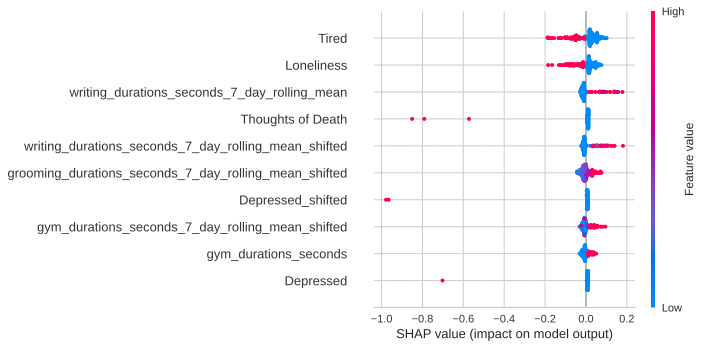

In [28]:
interpret_model(et, max_display=10, plot_size=(10,5),
                # save=True
               )

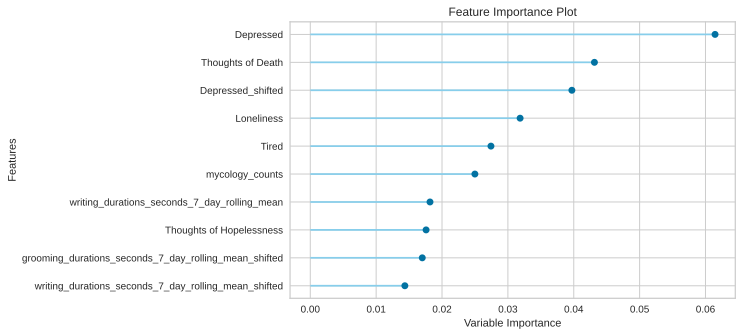

In [29]:
plot_model(et, plot='feature')


In [32]:
finalize_model(et)

Pipeline(memory=Memory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Step Count', 'Resting Heart Rate',
                                             'Number of Floors',
                                             'Heart Rate Count',
                                             'Heart Rate Mean',
                                             'Heart Rate STD',
                                             'Heart Rate Minimum',
                                             'Heart Rate 25%',
                                             'Heart Rate Median',
                                             'Heart Rate 75%',
                                             'Heart Rate Maximum', 'Pain',
                                             'Tired', 'Sick', 'Anxiousness',
                                             'Depressed', 'Suicidal',
                                             'Self-Ha...
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(fill_value='constant',
                                                              strategy='constant'))),
                ('low_variance',
                 TransformerWrapper(exclude=[],
                                    transformer=VarianceThreshold(threshold=0))),
                ('normalize', TransformerWrapper(transformer=MaxAbsScaler())),
                ('actual_estimator',
                 ExtraTreesRegressor(n_jobs=-1, random_state=123))])

In [33]:
# xgboost = create_model('xgboost')

In [170]:
# xgboost = tune_model(xgboost)

In [34]:
# ada = create_model('ada')

In [167]:
# ada = tune_model(ada)

In [35]:
# elastic = create_model('en')

In [165]:
# elastic = tune_model(elastic)

In [36]:
# svm = create_model('svm')

In [163]:
# svm = tune_model(svm)

In [ ]:
# ard = create_model('ard', fold = 5)

In [ ]:
# ard = tune_model(ard)

In [77]:
# catboost = create_model('catboost')

In [72]:
# catboost, tuner = tune_model(catboost, optimize='MAPE', return_tuner=True)

In [73]:
# type(catboost), type(tuner)

In [76]:
# print(tuner)

In [78]:
## evaluate trained model
#evaluate_model(catboost)

In [79]:
#predict_model(catboost)

In [37]:
# model_list = [#lr, 
#           rf, 
#           #extra_trees,
#           xgboost, 
#           ada, 
#           elastic, 
#           svm, 
#           #ard,
#           #catboost
#          ]

In [38]:
# voting = blend_models(model_list, 
#                        # fold=2,
#                        #optimize='mape',
#                        return_train_score=True,
#                        choose_better=True)

In [39]:
# print(voting)

In [40]:
#tuned_voting = tune_model(voting, 
#                           # n_iter=1,
#                           # fold=2,
#                           #optimize='mape',
#                           return_train_score=True, 
#                           choose_better=True)

In [41]:
#print(tuned_voting)

In [42]:
#evaluate_model(tuned_voting)

In [43]:
#predict_model(tuned_voting)

In [176]:
#interpret_model(tuned_voting, max_display=10, plot_size=(10, 5),
#                # save=True
#               )

In [179]:
# finalize_model(tuned_voting)

In [180]:
#interpret_model(tuned_voting, max_display=10, plot_size=(10, 5),
#                # save=True
#               )

# Blender pipeline

In [7]:
best = compare_models(sort=metric, turbo=False, exclude=exclude, n_select=5)

In [8]:
print(best)

[DecisionTreeRegressor(random_state=123), HuberRegressor(), ExtraTreesRegressor(n_jobs=-1, random_state=123), SVR(), <catboost.core.CatBoostRegressor object at 0x7f5f45d0af40>]


In [9]:
blender = blend_models(best, 
                       # fold=2,
                       optimize='mape',
                       return_train_score=True,
                       choose_better=True)

Original model was better than the blended model, hence it will be returned. NOTE: The display metrics are for the blended model (not the original one).


In [10]:
print(blender)

DecisionTreeRegressor(random_state=123)


In [17]:
tuned_blender = tune_model(blender, 
                           # n_iter=1,
                           # fold=2,
                           # optimize='mape',
                           return_train_score=True, 
                           choose_better=True)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [18]:
print(tuned_blender)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, max_features=1.0,
                      min_impurity_decrease=0.01, min_samples_leaf=2,
                      min_samples_split=9, random_state=123)


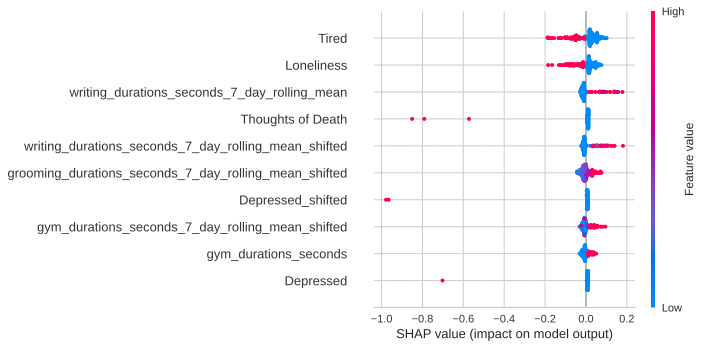

In [33]:
interpret_model(et, max_display=10, plot_size=(10,5),
                # save=True
               )

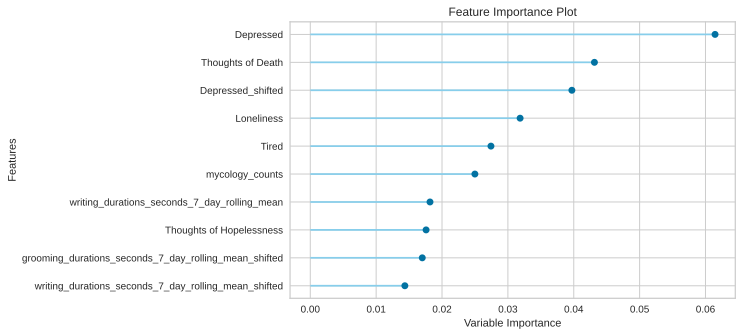

In [20]:
plot_model(et, plot='feature')

# Finalize Model

In [16]:
# evaluate trained model
evaluate_model(tuned_blender)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [17]:
df2 = df.copy()
df2.drop('Mood', axis = 1, inplace = True)
predict_model(tuned_blender, data = df2)

Step Count  Resting Heart Rate  Number of Floors  Heart Rate Count  \
0         1041.0                56.0               0.0            1349.0   
1          321.0                58.0               0.0            1421.0   
2         1659.0                57.0               1.0            1298.0   
3         8407.0                58.0               8.0            1390.0   
4         4520.0                57.0               2.0            1407.0   
...          ...                 ...               ...               ...   
1160      5008.0                54.0               3.0            1414.0   
1161      4960.0                55.0               8.0            1419.0   
1162       358.0                53.0               0.0            1407.0   
1163       749.0                54.0               0.0            1440.0   
1164      3203.0                53.0               1.0            1390.0   

      Heart Rate Mean  Heart Rate STD  Heart Rate Minimum  Heart Rate 25%  \
0           61.689400        7.496629                46.0            57.0   
1           61.500351        7.566385                39.0            56.0   
2           63.006935       10.599274                48.0            54.0   
3           66.987053       10.906427                53.0            60.0   
4           64.260124        9.231062                51.0            58.0   
...               ...             ...                 ...             ...   
1160        62.904526       13.044269                45.0            52.0   
1161        71.594788        9.812272                50.0            66.0   
1162        57.001423       10.917119                43.0            49.0   
1163        62.082638        8.746971                48.0            56.0   
1164        60.641727       17.659803                44.0            48.0   

      Heart Rate Median  Heart Rate 75%  ...  \
0                  60.0            65.0  ...   
1                  61.0            66.0  ...   
2                  62.0            70.0  ...   
3                  64.0            71.0  ...   
4                  62.0            68.0  ...   
...                 ...             ...  ...   
1160               58.0            74.0  ...   
1161               70.0            75.0  ...   
1162               52.0            63.0  ...   
1163               60.0            67.0  ...   
1164               52.0            68.0  ...   

      concert_event_durations_seconds_shifted  concert_event_counts_shifted  \
0                                         0.0                           0.0   
1                                         0.0                           0.0   
2                                         0.0                           0.0   
3                                         0.0                           0.0   
4                                         0.0                           0.0   
...                                       ...                           ...   
1160                                      0.0                           0.0   
1161                                      0.0                           0.0   
1162                                      0.0                           0.0   
1163                                      0.0                           0.0   
1164                                      0.0                           0.0   

      concert_event_durations_seconds_7_day_rolling_mean_shifted  \
0                                                   0.0            
1                                                   0.0            
2                                                   0.0            
3                                                   0.0            
4                                                   0.0            
...                                                 ...            
1160                                                0.0            
1161                                                0.0            
1162                          

In [18]:
finalize_model(tuned_blender)

Pipeline(memory=Memory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Step Count', 'Resting Heart Rate',
                                             'Number of Floors',
                                             'Heart Rate Count',
                                             'Heart Rate Mean',
                                             'Heart Rate STD',
                                             'Heart Rate Minimum',
                                             'Heart Rate 25%',
                                             'Heart Rate Median',
                                             'Heart Rate 75%',
                                             'Heart Rate Maximum', 'Pain',
                                             'Tired', 'Sick', 'Anxiousness',
                                             'Depressed', 'Suicidal',
                                             'Self-Ha...
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(fill_value='constant',
                                                              strategy='constant'))),
                ('low_variance',
                 TransformerWrapper(exclude=[],
                                    transformer=VarianceThreshold(threshold=0))),
                ('actual_estimator',
                 DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                                       max_features=1.0,
                                       min_impurity_decrease=0.01,
                                       min_samples_leaf=2, min_samples_split=9,
                                       random_state=123))])

# Save Models

In [35]:
save_model(et, 'data/models/et_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Step Count', 'Resting Heart Rate',
                                              'Number of Floors',
                                              'Heart Rate Count',
                                              'Heart Rate Mean',
                                              'Heart Rate STD',
                                              'Heart Rate Minimum',
                                              'Heart Rate 25%',
                                              'Heart Rate Median',
                                              'Heart Rate 75%',
                                              'Heart Rate Maximum', 'Pain',
                                              'Tired', 'Sick', 'Anxiousness',
                                              'Depressed', 'Suicidal',
                                              'Self-Ha...
                         

In [181]:
save_model(best, 'data/models/best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Step Count', 'Resting Heart Rate',
                                              'Number of Floors',
                                              'Heart Rate Count',
                                              'Heart Rate Mean',
                                              'Heart Rate STD',
                                              'Heart Rate Minimum',
                                              'Heart Rate 25%',
                                              'Heart Rate Median',
                                              'Heart Rate 75%',
                                              'Heart Rate Maximum', 'Pain',
                                              'Tired', 'Sick', 'Anxiousness',
                                              'Depressed', 'Suicidal',
                                              'Self-Ha...
                 ('low_va

In [182]:
save_model(blender, 'data/models/blender_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Step Count', 'Resting Heart Rate',
                                              'Number of Floors',
                                              'Heart Rate Count',
                                              'Heart Rate Mean',
                                              'Heart Rate STD',
                                              'Heart Rate Minimum',
                                              'Heart Rate 25%',
                                              'Heart Rate Median',
                                              'Heart Rate 75%',
                                              'Heart Rate Maximum', 'Pain',
                                              'Tired', 'Sick', 'Anxiousness',
                                              'Depressed', 'Suicidal',
                                              'Self-Ha...
                         

In [178]:
save_model(tuned_blender, 'data/models/tuned_blender_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Step Count', 'Resting Heart Rate',
                                              'Number of Floors',
                                              'Heart Rate Count',
                                              'Heart Rate Mean',
                                              'Heart Rate STD',
                                              'Heart Rate Minimum',
                                              'Heart Rate 25%',
                                              'Heart Rate Median',
                                              'Heart Rate 75%',
                                              'Heart Rate Maximum', 'Pain',
                                              'Tired', 'Sick', 'Anxiousness',
                                              'Depressed', 'Suicidal',
                                              'Self-Ha...
                         

# Get Models

In [8]:
et = load_model('data/models/et_pipeline')
et = et['trained_model']

Transformation Pipeline and Model Successfully Loaded


In [10]:
load_model('data/models/best_pipeline')

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=Memory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Step Count', 'Resting Heart Rate',
                                             'Number of Floors',
                                             'Heart Rate Count',
                                             'Heart Rate Mean',
                                             'Heart Rate STD',
                                             'Heart Rate Minimum',
                                             'Heart Rate 25%',
                                             'Heart Rate Median',
                                             'Heart Rate 75%',
                                             'Heart Rate Maximum', 'Pain',
                                             'Tired', 'Sick', 'Anxiousness',
                                             'Depressed', 'Suicidal',
                                             'Self-Ha...
                ('low_variance',
                 TransformerWrapper(exclude=[],
                                    transformer=VarianceThreshold(threshold=0))),
                ('trained_model',
                 [ExtraTreesRegressor(n_jobs=-1, random_state=123),
                  RandomForestRegressor(n_jobs=-1, random_state=123),
                  DecisionTreeRegressor(random_state=123),
                  GradientBoostingRegressor(random_state=123),
                  <catboost.core.CatBoostRegressor object at 0x7f725c52ecd0>])])

In [11]:
load_model('data/models/blender_pipeline')

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=Memory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Step Count', 'Resting Heart Rate',
                                             'Number of Floors',
                                             'Heart Rate Count',
                                             'Heart Rate Mean',
                                             'Heart Rate STD',
                                             'Heart Rate Minimum',
                                             'Heart Rate 25%',
                                             'Heart Rate Median',
                                             'Heart Rate 75%',
                                             'Heart Rate Maximum', 'Pain',
                                             'Tired', 'Sick', 'Anxiousness',
                                             'Depressed', 'Suicidal',
                                             'Self-Ha...
                                             'Self Isolation', 'Paranoia',
                                             'Elevated', ...],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(fill_value='constant',
                                                              strategy='constant'))),
                ('low_variance',
                 TransformerWrapper(exclude=[],
                                    transformer=VarianceThreshold(threshold=0))),
                ('trained_model',
                 ExtraTreesRegressor(n_jobs=-1, random_state=123))])

In [12]:
tuned_blender = load_model('data/models/tuned_blender_pipeline')

Transformation Pipeline and Model Successfully Loaded


In [13]:
tuned_blender = tuned_blender['trained_model']

In [15]:
print(tuned_blender)

ExtraTreesRegressor(n_jobs=-1, random_state=123)


# Charts

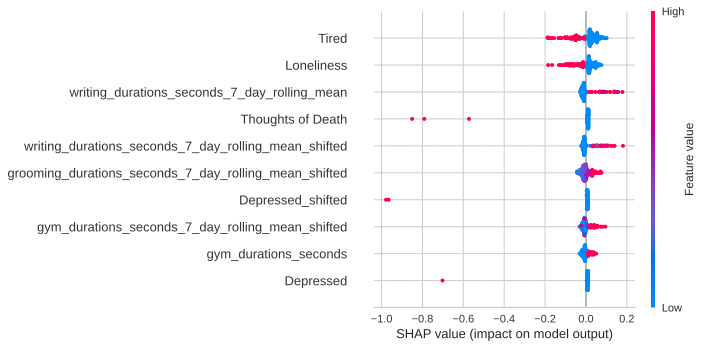

In [64]:
interpret_model(et, max_display=10, plot_size=(10,5),
                # save=True
               )

In [16]:
# help(plot_model)

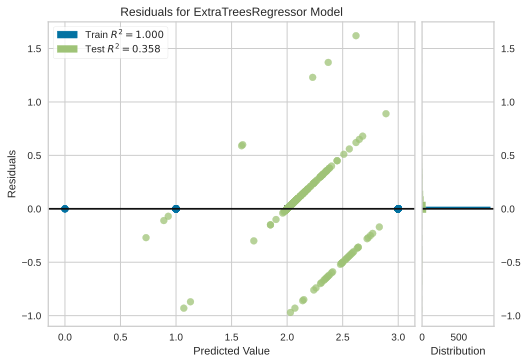

In [17]:
plot_model(et, plot = 'residuals')

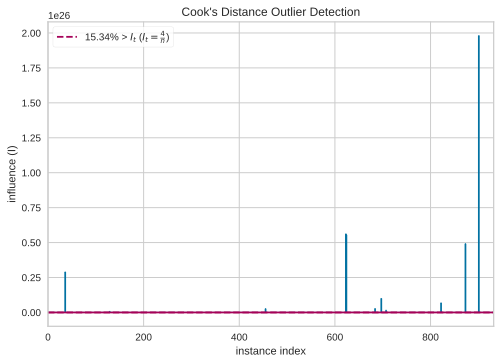

In [50]:
plot_model(et, plot = 'cooks')

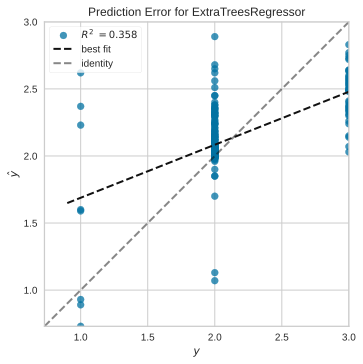

In [51]:
plot_model(et, plot = 'error')

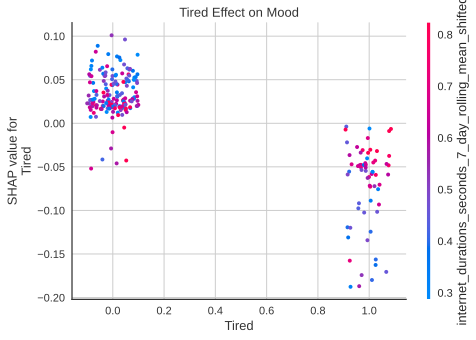

In [81]:
interpret_model(et, plot = 'correlation', feature = 'Tired', x_jitter=.2, title='Tired Effect on Mood',
#save=True
)

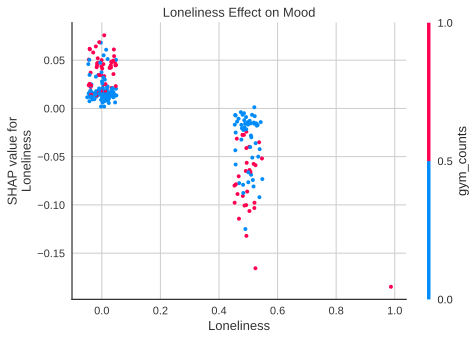

In [94]:
interpret_model(et, plot = 'correlation', feature = 'Loneliness', title='Loneliness Effect on Mood', x_jitter=.2, 
                # save=True
               )

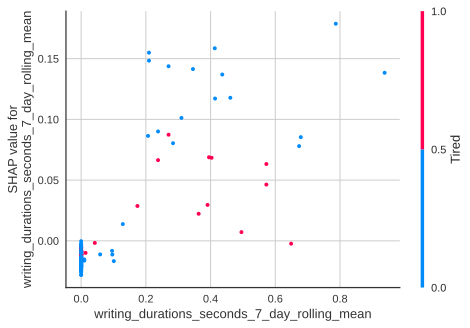

In [38]:
interpret_model(et, plot = 'correlation', feature = 'writing_durations_seconds_7_day_rolling_mean')

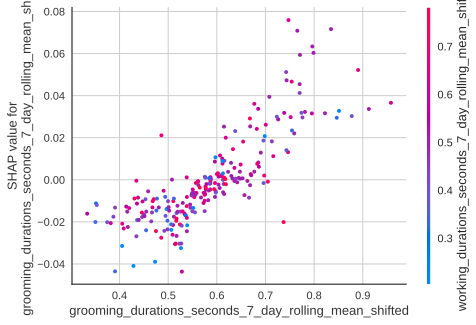

In [136]:
interpret_model(et, plot = 'correlation', 
                      feature = 'grooming_durations_seconds_7_day_rolling_mean_shifted',
                      # title='grooming_durations_seconds_7_day_rolling_mean_shifted Effect on Mood',
                      # save=True
               )

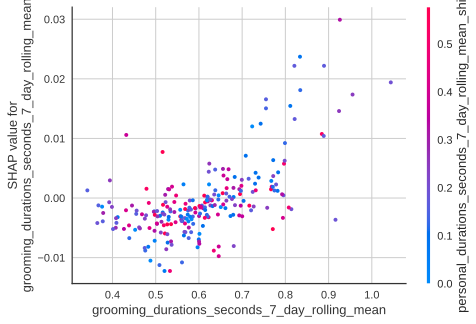

In [139]:
interpret_model(et, plot = 'correlation', 
                      feature = 'grooming_durations_seconds_7_day_rolling_mean',
                      # title='grooming_durations_seconds_7_day_rolling_mean Effect on Mood',
                      # save=True
               )

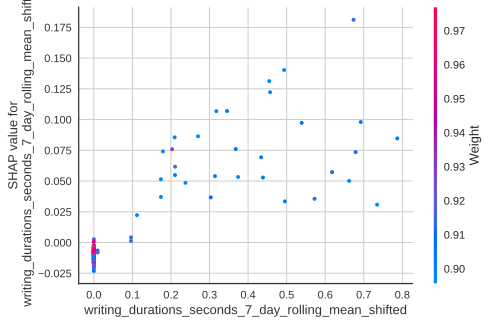

In [25]:
interpret_model(et, plot = 'correlation', feature = 'writing_durations_seconds_7_day_rolling_mean_shifted')

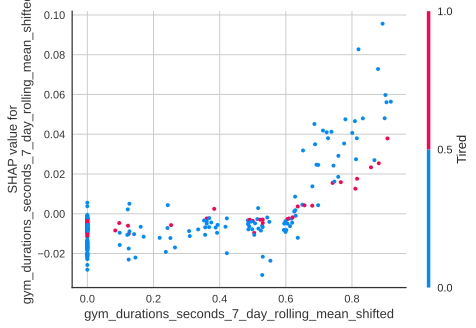

In [83]:
interpret_model(et, plot = 'correlation', feature = 'gym_durations_seconds_7_day_rolling_mean_shifted')

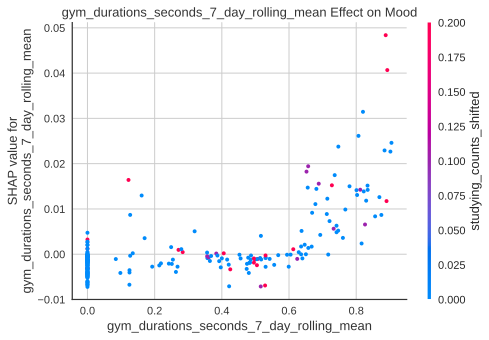

In [140]:
interpret_model(et, plot = 'correlation', feature = 'gym_durations_seconds_7_day_rolling_mean', 
                title='gym_durations_seconds_7_day_rolling_mean Effect on Mood',
                # save=True
               )

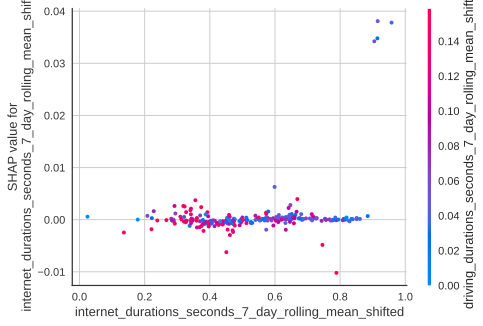

In [33]:
interpret_model(et, plot = 'correlation', feature = 'internet_durations_seconds_7_day_rolling_mean_shifted')

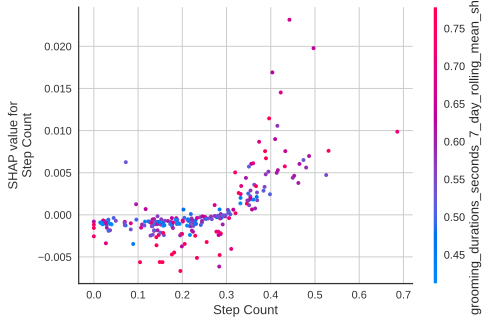

In [58]:
interpret_model(et, plot = 'correlation', feature = 'Step Count')

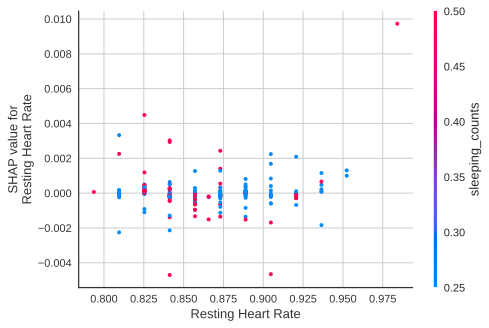

In [41]:
interpret_model(et, plot = 'correlation', feature = 'Resting Heart Rate')

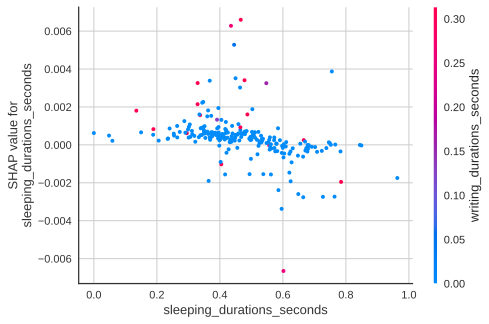

In [60]:
interpret_model(et, plot = 'correlation', feature = 'sleeping_durations_seconds')

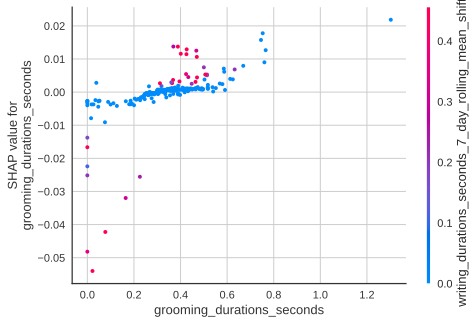

In [61]:
interpret_model(et, plot = 'correlation', feature = 'grooming_durations_seconds')

In [49]:
interpret_model(et, plot = 'reason', feature_names='Tired')

In [50]:
interpret_model(et, plot = 'reason', feature_names='Loneliness')

In [29]:
interpret_model(et, plot = 'reason', observation=1)

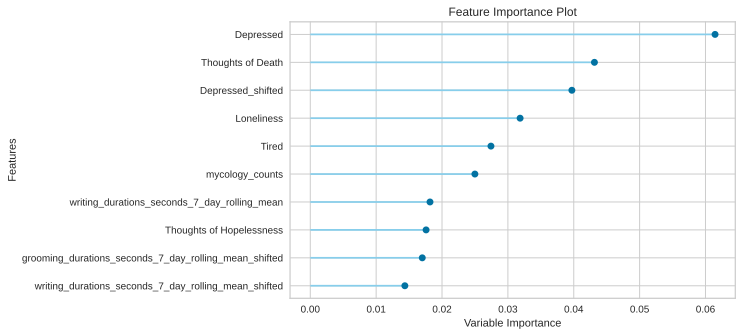

In [31]:
plot_model(et, plot='feature')

In [64]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Dashboard

In [13]:
dashboard(et, dashboard_kwargs={#'shap_interaction': False, 
    'no_permutations':True})

Changing class type to RandomForestRegressionExplainer...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating ShadowDecTree for each individual decision tree...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering call

 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8050
 * Running on http://10.0.2.15:8050 (Press CTRL+C to quit)
10.0.2.15 - - [08/Apr/2023 01:50:23] "GET / HTTP/1.1" 200 -
10.0.2.15 - - [08/Apr/2023 01:50:23] "GET /assets/bootstrap.min.css?m=1671360597.410302 HTTP/1.1" 304 -
10.0.2.15 - - [08/Apr/2023 01:50:24] "GET /_dash-dependencies HTTP/1.1" 200 -
10.0.2.15 - - [08/Apr/2023 01:50:24] "GET /_dash-layout HTTP/1.1" 200 -
10.0.2.15 - - [08/Apr/2023 01:50:24] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
10.0.2.15 - - [08/Apr/2023 01:50:24] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
10.0.2.15 - - [08/Apr/2023 01:50:25] "POST /_dash-update-component HTTP/1.1" 200 -
10.0.2.15 - - [08/Apr/2023 01:50:25] "POST /_dash-update-component HTTP/1.1" 204 -
10.0.2.15 - - [08/Apr/2023 01:50:25] "POST /_dash-update-component HTTP/1.1" 200 -
10.0.2.15 - - [08/Apr/2023 01:50:25] "POST /_dash-update-component HTTP/1.1" 200 -
10.0.2

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/home/mcwaage1/qs/pycaret/lib/python3.9/site-packages/flask/app.py", line 2073, in wsgi_app
    response = self.full_dispatch_request()
  File "/home/mcwaage1/qs/pycaret/lib/python3.9/site-packages/flask/app.py", line 1519, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/home/mcwaage1/qs/pycaret/lib/python3.9/site-packages/flask/app.py", line 1517, in full_dispatch_request
    rv = self.dispatch_request()
  File "/home/mcwaage1/qs/pycaret/lib/python3.9/site-packages/flask/app.py", line 1503, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "/home/mcwaage1/qs/pycaret/lib/python3.9/site-packages/dash/dash.py", line 1274, in dispatch
    ctx.run(
  File "/home/mcwaage1/qs/pycaret/lib/python3.9/site-packages/dash/_callback.py", line 440, in add_context
    output_value = func(*func_args, **func_kwargs)  # %% callback invo

10.0.2.15 - - [08/Apr/2023 01:55:06] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/home/mcwaage1/qs/pycaret/lib/python3.9/site-packages/flask/app.py", line 2073, in wsgi_app
    response = self.full_dispatch_request()
  File "/home/mcwaage1/qs/pycaret/lib/python3.9/site-packages/flask/app.py", line 1519, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/home/mcwaage1/qs/pycaret/lib/python3.9/site-packages/flask/app.py", line 1517, in full_dispatch_request
    rv = self.dispatch_request()
  File "/home/mcwaage1/qs/pycaret/lib/python3.9/site-packages/flask/app.py", line 1503, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "/home/mcwaage1/qs/pycaret/lib/python3.9/site-packages/dash/dash.py", line 1274, in dispatch
    ctx.run(
  File "/home/mcwaage1/qs/pycaret/lib/python3.9/site-packages/dash/_callback.py", line 440, in add_context
    output_value = func(*func_args, **func_kwargs)  # %% callback invo

10.0.2.15 - - [08/Apr/2023 01:55:28] "POST /_dash-update-component HTTP/1.1" 500 -


In [137]:
# get_leaderboard()

# Explaining the other variables

In [93]:
s2 = setup(df, target='Tired', fold=5, session_id=123, 
          # ignore_features = ['Timestamp'],
          # normalize = True, 
          # transformation = True, 
          # transform_target = True, 
          # remove_multicollinearity = True, 
          # multicollinearity_threshold = 0.95
         )

In [ ]:
blender2 = blend_models(compare_models(sort=metric, turbo=False, exclude=exclude, n_select=5), choose_better=True)

# Other model plots

In [73]:
# # xgboost, lightgbm, catboost, rf, et, dt.
# interpret_model(rf)

In [74]:
# interpret_model(rf, plot = 'correlation', feature = 'Resting Heart Rate')

In [76]:
# interpret_model(rf, plot = 'correlation', feature = 'sleeping_durations_seconds')

In [78]:
# interpret_model(rf, plot = 'reason')

In [80]:
# plot_model(rf, plot='feature')

In [82]:
# plot_model(lr, plot = 'diagnostics')

In [84]:
# plot_model(rf, plot = 'auc')

In [86]:
# evaluate_model(voting)

In [88]:
# predict_model(voting)